
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np


Using TensorFlow backend.


In [2]:
def build_model():
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()
    
    #   第二步：構建網絡層 - 注意節點不要太多，不然會訓練無效。
    model.add(Dense( 128,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   
    
    model.add(Dense( 128)) # 隱藏層節點 128 個   
    model.add(Activation('relu'))  
    
    model.add(Dense( 128)) # 隱藏層節點 128 個  
    model.add(Activation('relu'))  
    
    model.add(Dense( 128)) # 隱藏層節點 128 個   
    model.add(Activation('relu'))  
    
    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    model.summary()
    
    return model

In [3]:
#  資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (np.arange(10) == y_train[:, None]).astype(int)
Y_test = (np.arange(10) == y_test[:, None]).astype(int)


In [7]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

def opt(mod, optimizer, batch_size=64, epochs=10):
    mod.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    print(f'Optimizer:{optimizer}, batch_size:{batch_size}, epochs:{epochs}\n')
    history = mod.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2,validation_split=0.3 )
    scores = mod.evaluate(X_test, Y_test, batch_size=batch_size, verbose= 0)
    print('\nThe test loss is %f', scores)
    result = mod.predict(X_test, batch_size=batch_size, verbose= 0)
    
    result_max = np.argmax(result, axis=1)
    test_max = np.argmax(Y_test, axis=1)
    
    result_bool = np.equal(result_max, test_max)
    true_num = np.sum(result_bool)
    
    print('The accuracy of the model is %f \n\n' %(true_num/len(result_bool)))
    
    return history

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

def plotfig(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_61 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_62 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_63 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
__________

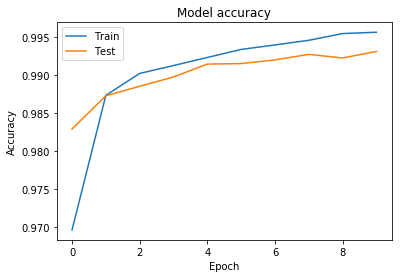

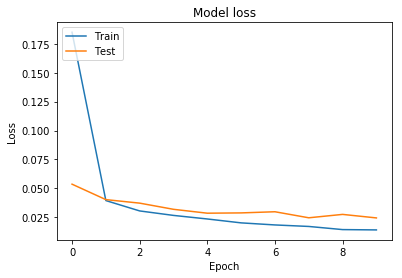

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_66 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_67 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_68 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
__________

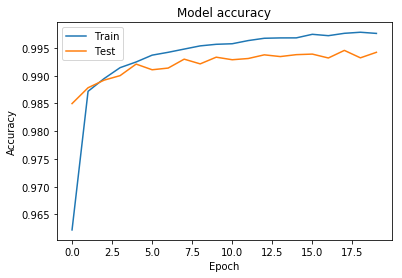

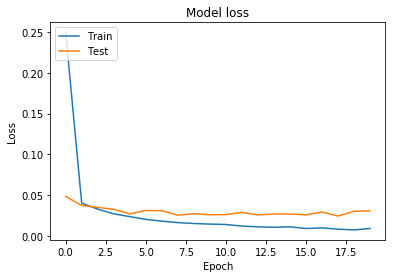

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_71 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_72 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_73 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
__________

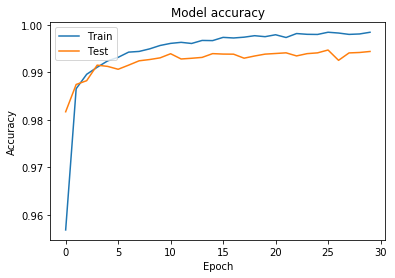

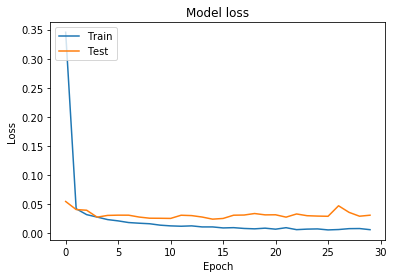

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_76 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_77 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_78 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
__________

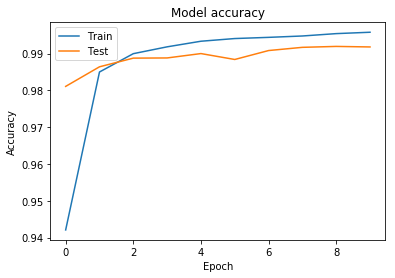

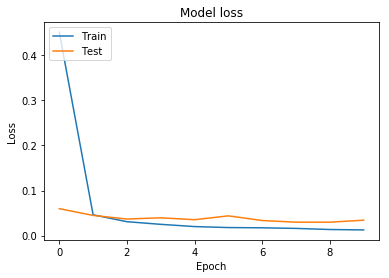

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_81 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_82 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_83 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               16512     
__________

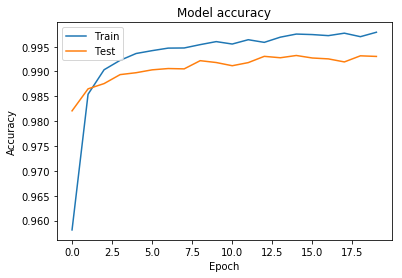

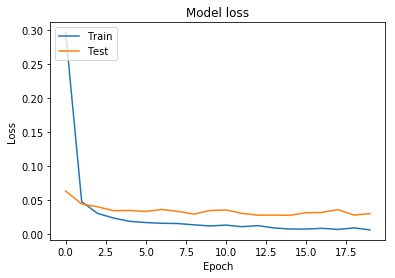

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_86 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_87 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_88 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 128)               16512     
__________

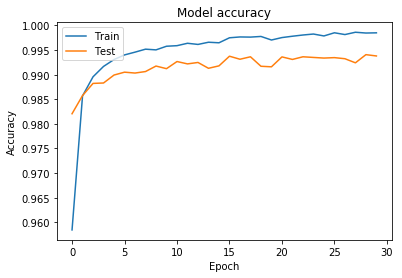

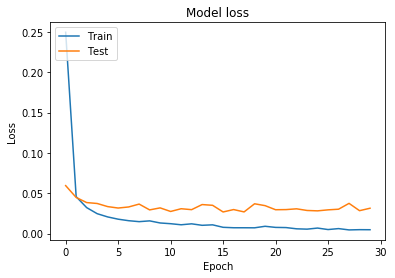

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_91 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_92 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_93 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               16512     
__________

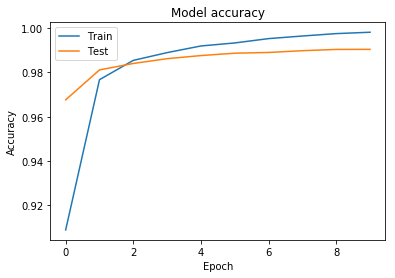

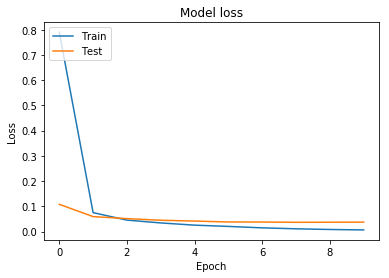

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_96 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_97 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_98 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 128)               16512     
__________

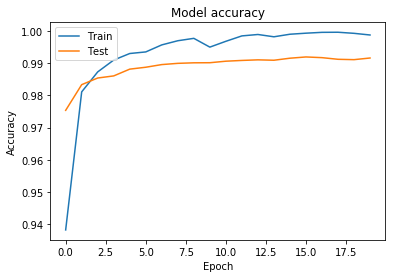

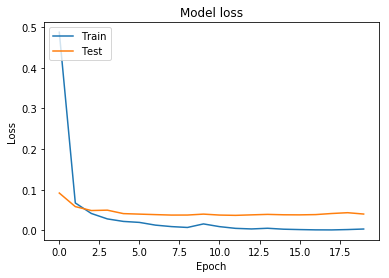

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation_101 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_102 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 128)               16512     
_________________________________________________________________
activation_103 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 128)               16512     
__________

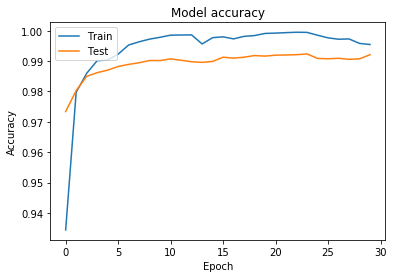

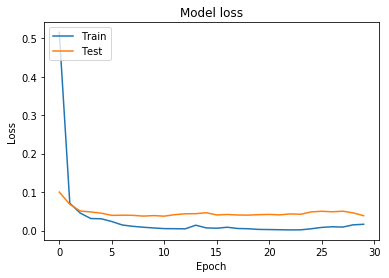

In [10]:
# 第五步：訓練, 修正 model 參數
batch_size_list = [32, 128, 512]
epochs_list = [10, 20, 30]

for batch_size in batch_size_list:
    for epochs in epochs_list:
        history_log = opt(build_model(), optimizer = 'adam', batch_size=batch_size, epochs=epochs)
        plotfig(history_log)

# Conclusion
* batch_size 使用越小的數值得到的準確度越高，推測是因為訓練的 set 較多，因此可以得到較好的訓練結果。
* 因為訓練完成後進行測試所得到的準確度發生了震盪現象，因此無法推斷 epochs 越高得到的效果越好。但理論上 epochs 效果越好。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_51 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_52 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_53 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
__________

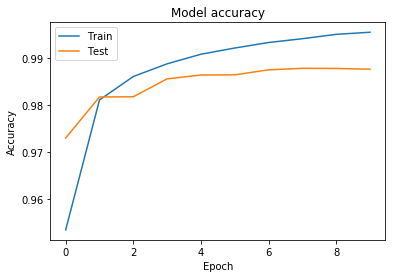

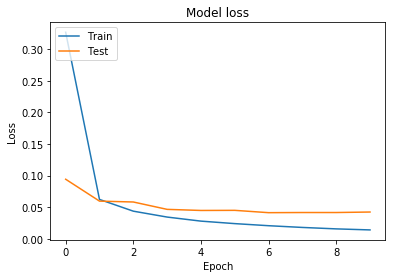

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_56 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_57 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_58 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
__________

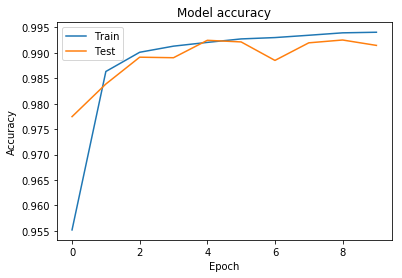

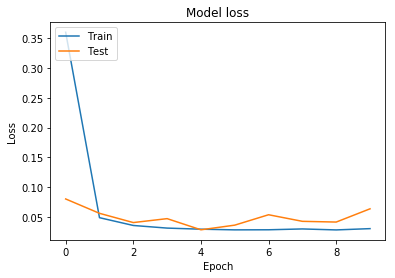

In [9]:
opt_list = ['sgd', 'rmsprop']

for optimizer in opt_list:
    history_log = opt(build_model(), optimizer=optimizer)
    plotfig(history_log)

# Conclusion
* 使用 rmsprop 所得到的測試結果貼近訓練結果的速度比較快，但是震盪現象會較為明顯。可驗證講義所說的 SGD 結果較為平滑；rmsprop 藉由調整 learning rate，所以收斂速度較快。